# Introduction to Artificial Intelligence: HS 2023


---

## Lecture 8: Unsupervised Learning (Data Clustering)


# 1. Import Libraries

In [ ]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from skimage import io
import time

from sklearn.utils import shuffle
from sklearn.cluster import KMeans

In [ ]:
%matplotlib inline

# 2. Load Dataset

In [ ]:
ls sample_data/

anscombe.json*               california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv                README.md*


In [ ]:
df = pd.read_csv('mall_customers.csv') # read the customers' .csv file
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
columns={'Annual Income (k$)': 'annual_income', 'Spending Score (1-100)': 'spending_score'}
#df = df.rename(columns)
df.rename(columns, inplace=True, axis=1)
print(df)

     CustomerID  Gender  Age  annual_income  spending_score
0             1    Male   19             15              39
1             2    Male   21             15              81
2             3  Female   20             16               6
3             4  Female   23             16              77
4             5  Female   31             17              40
..          ...     ...  ...            ...             ...
195         196  Female   35            120              79
196         197  Female   45            126              28
197         198    Male   32            126              74
198         199    Male   32            137              18
199         200    Male   30            137              83

[200 rows x 5 columns]


In [ ]:
X = df[['annual_income', 'spending_score']] # use the annual income and spending scores are variables
print(X)

     annual_income  spending_score
0               15              39
1               15              81
2               16               6
3               16              77
4               17              40
..             ...             ...
195            120              79
196            126              28
197            126              74
198            137              18
199            137              83

[200 rows x 2 columns]


<ipython-input-31-49c825ab440f>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


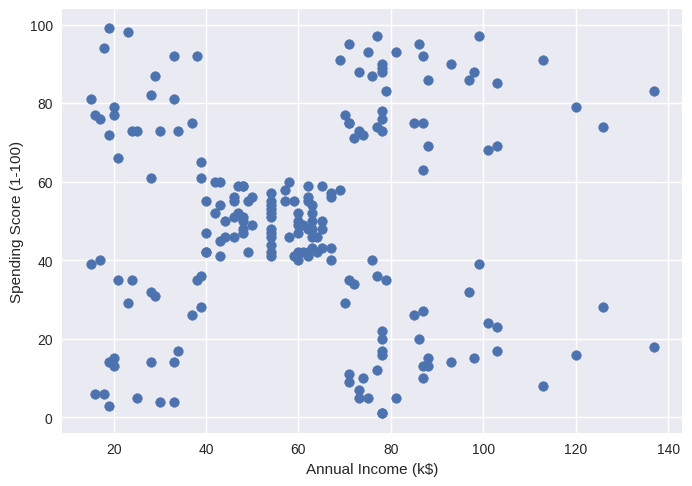

In [ ]:
plt.style.use('seaborn')
#plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)']) # plot the annual income vs. spending score
plt.scatter(X['annual_income'], X['spending_score'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# 3. K-Means parameter search with Elbow Method

In [ ]:
def elbow_method(X, max_k = 10):
  costs = [] # create an empty list containing the associated costs
  for k in range(2, max_k): # try different k-values
     model = KMeans(n_clusters=k) # initialise a K-means object with the corresponding "k" clusters
     model.fit(X) # fit your knn model onto the data X
     inertia = model.inertia_
     costs.append(inertia) # add the models's inertia onto the cost array
  return costs

In [ ]:
max_k = 10 # set the total number of maximum k-values
costs = elbow_method(X, max_k=max_k) # call the elbow_method using max_k

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Cost')

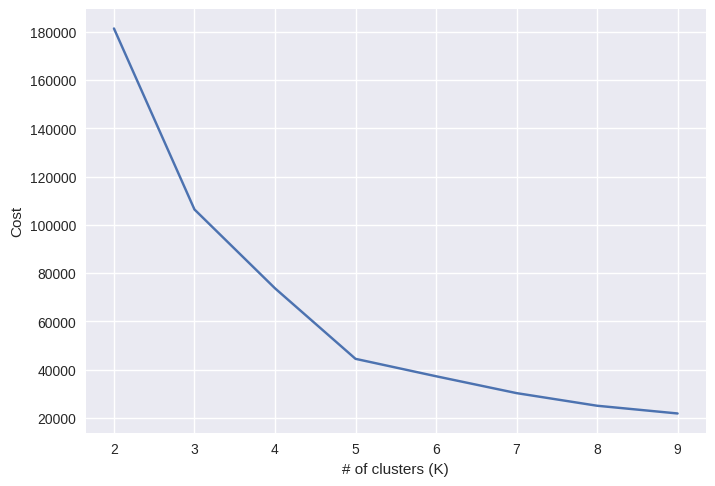

In [ ]:
# plot cost against number of clusters
plt.close()
plt.plot(list(range(2, max_k)), costs) # plot the different cluster numbers vs. the associated costs.
plt.xlabel("# of clusters (K)")
plt.ylabel("Cost")


# 4. Run K-Means

In [ ]:
# Initialise k-Means++, with 5 clusters
# Fit the k-Means object on the dataset
model = KMeans(n_clusters=5, random_state=0, init='k-means++', max_iter=500, verbose=1)
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 59949.0.
Iteration 1, inertia 45739.84095125858.
Iteration 2, inertia 44448.4554479337.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 75023.0.
Iteration 1, inertia 67127.26389297933.
Iteration 2, inertia 66790.25561457995.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 66897.0.
Iteration 1, inertia 45892.95007750564.
Iteration 2, inertia 44537.44148309423.
Iteration 3, inertia 44478.400756657655.
Iteration 4, inertia 44454.476479679724.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 65979.0.
Iteration 1, inertia 44964.37482592396.
Iteration 2, inertia 44495.99808029694.
Iteration 3, inertia 44448.4554479337.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 77559.0.
Iteration 1, inertia 58201.15967197552.
Iteration 2, inertia 53921.45976901885.
Iteration 3, inertia 48207

KMeans(max_iter=500, n_clusters=5, random_state=0, verbose=1)

In [ ]:
model.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [ ]:
centers = model.cluster_centers_ # get the cluster centers: u1, u2, ..., u5
labels = model.labels_ # get the cluster assignments/labels, s1->u1, s2->u5, ....

<ipython-input-39-9d2a1ef85d0b>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-39-9d2a1ef85d0b>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-39-9d2a1ef85d0b>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.u

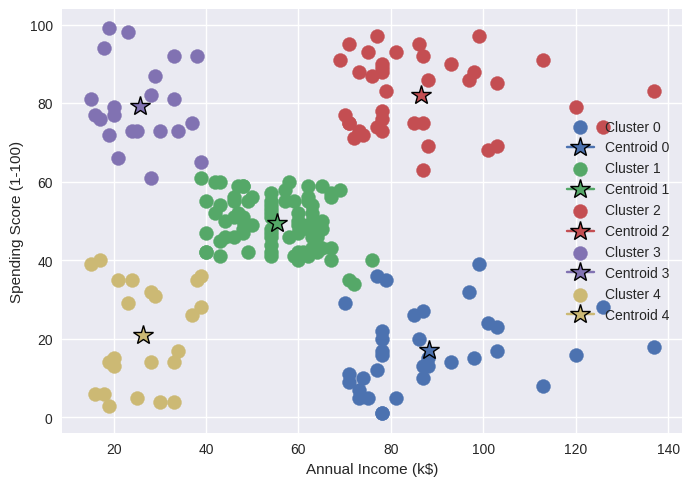

In [ ]:
X_arr = X.iloc[:,[0,1]].values
plt.close()
for i, cluster_mean in enumerate(centers):
    plt.scatter(X_arr[labels == i, 0], X_arr[labels == i, 1], s = 100, label = 'Cluster ' + str(i))
    plt.plot(cluster_mean[0], cluster_mean[1], label = 'Centroid ' + str(i), marker='*', markersize=15, markeredgecolor="k", markeredgewidth=1)
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.style.use('seaborn')
    plt.legend()

# 5. Image compression with K-Means

In [ ]:
def img_quantise(img, n_colors):
  w, h, d = orig_shape = tuple(img.shape)
  assert d == 3
  ... # map img (w,h,d) -> img(w*h, d)
  ... # shuffle pixels
  ... # initialise K-means with "k=n_colors" clusters
  ... # fit k-means
  ... # get cluster centers
  ... # get data point assignments
  ...  # get quantised image
  ... # reshape it to original size
  return quant_img

In [ ]:
img = cv2.imread('sample_data/beach.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img/255
orig_shape = img.shape

In [ ]:
n_colors = 8
qimg = img_quantise(img, n_colors)

In [ ]:
%matplotlib inline
plt.close()
plt.axis('off')
plt.imshow(img)

In [ ]:
plt.close()
plt.axis('off')
plt.imshow(qimg)